# **Análise Preço Gasolina - Brasil**

O objetivo deste notebook é demonstrar e praticar a análise de dados utilizando o **Python** e suas ferramentas.

Utilizamos o **Pandas** para tratamento e análise dos dados, e o **Matplotlib** e **Seaborn** para criar visualizações.

O Dataset original utilizado neste notebook foi extraido do kaggle: https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil.
Ele foi dividido em dois arquivos CSV para demonstrar como podemos efetuar a união de dois datasets distintos.

In [88]:
# importação bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

## **Preparação dos Dados**

In [2]:
df_2000 = pd.read_csv('gasolina_2000+.csv', index_col=0)
df_2000.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [3]:
df_2010 = pd.read_csv('gasolina_2010+.csv', dtype='unicode', index_col=0)
df_2010.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
9256,2011-01-02,2011-01-08,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,80,R$/l,2.03,0.003,2.02,2.05,0.411,0.001,1.619,0.013,1.6111,1.6411,0.008
9257,2011-01-02,2011-01-08,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,255,R$/l,1.717,0.102,1.49,1.99,0.225,0.059,1.492,0.069,1.3221,1.6201,0.046
9258,2011-01-02,2011-01-08,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,141,R$/l,1.848,0.148,1.59,2.49,0.326,0.08,1.522,0.105,1.2833,1.7486,0.069
9259,2011-01-02,2011-01-08,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,132,R$/l,1.893,0.108,1.699,2.199,0.191,0.057,1.702,0.04,1.5915,1.79,0.024
9260,2011-01-02,2011-01-08,NORDESTE,ALAGOAS,ETANOL HIDRATADO,97,R$/l,2.026,0.084,1.749,2.1,0.268,0.0409999999999999,1.758,0.042,1.63,1.848,0.024


### **Combinando os dois dataframes**

In [4]:
# Confirmando se os 2 dataframes possuem as mesmas variáveis:
np.unique((df_2000.columns == df_2010.columns), return_counts=True)

(array([ True]), array([18], dtype=int64))

In [5]:
# Unindo os dataframes
df_combinado = pd.concat([df_2000, df_2010])

In [6]:
df_combinado

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.35,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.76,0.419,0.07,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.07,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.4,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.51,4.69,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.19,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


### **Separando as variáveis que vamos estudar**

In [7]:
df_combinado.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'],
      dtype='object')

In [8]:
filtro = ['DATA FINAL', 'ESTADO', 'PRODUTO', 'PREÇO MÉDIO REVENDA']

In [9]:
df = df_combinado[filtro]

In [10]:
df.head()

,DATA FINAL,ESTADO,PRODUTO,PREÇO MÉDIO REVENDA
0,2004-05-15,DISTRITO FEDERAL,ETANOL HIDRATADO,1.288
1,2004-05-15,GOIAS,ETANOL HIDRATADO,1.162
2,2004-05-15,MATO GROSSO,ETANOL HIDRATADO,1.389
3,2004-05-15,MATO GROSSO DO SUL,ETANOL HIDRATADO,1.262
4,2004-05-15,ALAGOAS,ETANOL HIDRATADO,1.181


## **Efetuando o tratamento dos dados**

### **Verificando os tipos de dados das variáveis**

Neste momento vamos verificar se as variáveis estão com os seus tipos de dados corretamente aplicados.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120823 entries, 0 to 120822
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATA FINAL           120823 non-null  object
 1   ESTADO               120823 non-null  object
 2   PRODUTO              120823 non-null  object
 3   PREÇO MÉDIO REVENDA  120823 non-null  object
dtypes: object(4)
memory usage: 4.6+ MB


Acima verificamos que precisamos fazer alguns ajustes nos dados:

* DATA FINAL - Transformar em Datetime
* A colunas de Preço devera sofrer alteração para tipo numérico.

In [12]:
#DATA FINAL para Datetime
df['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'])

In [13]:
#Convertendo demais colunas para formato numérico
df['PREÇO MÉDIO REVENDA'] = pd.to_numeric(df['PREÇO MÉDIO REVENDA'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120823 entries, 0 to 120822
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATA FINAL           120823 non-null  datetime64[ns]
 1   ESTADO               120823 non-null  object        
 2   PRODUTO              120823 non-null  object        
 3   PREÇO MÉDIO REVENDA  120823 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.6+ MB


### **Verificação de Dados Ausentes**

In [15]:
df.isna().sum()

DATA FINAL             0
ESTADO                 0
PRODUTO                0
PREÇO MÉDIO REVENDA    0
dtype: int64

Nossos campos selecionados não possuem dados ausentes.

## **Análise Exploratória**

In [16]:
df.head()

,DATA FINAL,ESTADO,PRODUTO,PREÇO MÉDIO REVENDA
0,2004-05-15,DISTRITO FEDERAL,ETANOL HIDRATADO,1.288
1,2004-05-15,GOIAS,ETANOL HIDRATADO,1.162
2,2004-05-15,MATO GROSSO,ETANOL HIDRATADO,1.389
3,2004-05-15,MATO GROSSO DO SUL,ETANOL HIDRATADO,1.262
4,2004-05-15,ALAGOAS,ETANOL HIDRATADO,1.181


In [17]:
df['PRODUTO'].value_counts()

GASOLINA COMUM        23570
GLP                   23561
ETANOL HIDRATADO      23440
ÓLEO DIESEL           21194
GNV                   14469
ÓLEO DIESEL S10        9113
OLEO DIESEL S10        2376
OLEO DIESEL            2351
GASOLINA ADITIVADA      749
Name: PRODUTO, dtype: int64

Vimos acima que existem o mesmo produto com nomenclatura diferente. Vamos corrigi-los.


In [18]:
df['PRODUTO'] = df['PRODUTO'].str.replace('OLEO DIESEL S10', 'ÓLEO DIESEL S10' )
df['PRODUTO'] = df['PRODUTO'].str.replace('OLEO DIESEL', 'ÓLEO DIESEL' )

In [19]:
df['PRODUTO'].value_counts()

GASOLINA COMUM        23570
GLP                   23561
ÓLEO DIESEL           23545
ETANOL HIDRATADO      23440
GNV                   14469
ÓLEO DIESEL S10       11489
GASOLINA ADITIVADA      749
Name: PRODUTO, dtype: int64

In [20]:
df.describe()

,PREÇO MÉDIO REVENDA
count,120823.000000
mean,11.473440
std,19.161823
min,0.766000
25%,2.157000
50%,2.899000
75%,4.026000
max,107.500000


In [21]:
df_gasolina_comum = df.query('PRODUTO == "GASOLINA COMUM"')

In [22]:
df_gasolina_comum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23570 entries, 12064 to 120725
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATA FINAL           23570 non-null  datetime64[ns]
 1   ESTADO               23570 non-null  object        
 2   PRODUTO              23570 non-null  object        
 3   PREÇO MÉDIO REVENDA  23570 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 920.7+ KB


In [72]:
df_gasolina_comum

,DATA FINAL,ESTADO,PRODUTO,PREÇO MÉDIO REVENDA
12064,2004-05-15,DISTRITO FEDERAL,GASOLINA COMUM,2.029
12065,2004-05-15,GOIAS,GASOLINA COMUM,2.025
12066,2004-05-15,MATO GROSSO,GASOLINA COMUM,2.358
12067,2004-05-15,MATO GROSSO DO SUL,GASOLINA COMUM,2.120
12068,2004-05-15,ALAGOAS,GASOLINA COMUM,2.090
...,...,...,...,...
120721,2021-05-01,RORAIMA,GASOLINA COMUM,5.364
120722,2021-05-01,SANTA CATARINA,GASOLINA COMUM,5.051
120723,2021-05-01,SAO PAULO,GASOLINA COMUM,5.265
120724,2021-05-01,SERGIPE,GASOLINA COMUM,5.586


In [97]:
df_gasolina_comum['ano-mes']  = df_gasolina_comum['DATA FINAL'].apply(lambda x: '{}'.format(x.year)) + df_gasolina_comum['DATA FINAL'].apply(lambda x: '/{:02d}'.format(x.month)) 

### **Em quais estados a gasolina foi mais barata e mais cara, por mês**

In [98]:
# Criando um dataframe em branco
df_comparacao = pd.DataFrame()

In [100]:
# Indentificando os indices dos combustiveis mais caro e mais barato
valor_max = df_gasolina_comum.groupby('ano-mes')['PREÇO MÉDIO REVENDA'].max()
valor_min = df_gasolina_comum.groupby('ano-mes')['PREÇO MÉDIO REVENDA'].min()


In [101]:
valor_max

ano-mes
2004/05    2.438
2004/06    2.496
2004/07    2.545
2004/08    2.560
2004/09    2.570
           ...  
2021/01    5.213
2021/02    5.809
2021/03    6.688
2021/04    6.227
2021/05    6.258
Name: PREÇO MÉDIO REVENDA, Length: 204, dtype: float64

In [102]:
valor_min

ano-mes
2004/05    1.888
2004/06    1.912
2004/07    1.936
2004/08    2.030
2004/09    2.031
           ...  
2021/01    3.830
2021/02    4.121
2021/03    4.579
2021/04    4.777
2021/05    4.867
Name: PREÇO MÉDIO REVENDA, Length: 204, dtype: float64

In [103]:
#Preenchendo o dataframe com novos valores

df_comparacao['valor_maximo'] = valor_max
df_comparacao['valor_minimo'] = valor_min
df_comparacao['diff_abs'] = df_comparacao['valor_maximo'] - df_comparacao['valor_minimo']
df_comparacao['diff_perc'] =  df_comparacao['diff_abs'] / df_comparacao['valor_minimo'] * 100

In [116]:
# incluindo as informações sobre os estados.
# no código abaixo retorna o indice dos valores minimos e maximos
idx_max = df_gasolina_comum.groupby('ano-mes')['PREÇO MÉDIO REVENDA'].idxmax().values
idx_min = df_gasolina_comum.groupby('ano-mes')['PREÇO MÉDIO REVENDA'].idxmin().values
df_comparacao['estado_maior_valor'] = df_gasolina_comum.loc[idx_max,:]['ESTADO'].values
df_comparacao['estado_menor_valor'] = df_gasolina_comum.loc[idx_min,:]['ESTADO'].values

In [118]:
df_comparacao

,valor_maximo,valor_minimo,diff_abs,diff_perc,estado_maior_valor,estado_menor_valor
ano-mes,,,,,,
2004/05,2.438,1.888,0.550,29.131356,ACRE,SAO PAULO
2004/06,2.496,1.912,0.584,30.543933,MATO GROSSO,SAO PAULO
2004/07,2.545,1.936,0.609,31.456612,ACRE,DISTRITO FEDERAL
2004/08,2.560,2.030,0.530,26.108374,MATO GROSSO,SAO PAULO
2004/09,2.570,2.031,0.539,26.538651,ACRE,SAO PAULO
...,...,...,...,...,...,...
2021/01,5.213,3.830,1.383,36.109661,ACRE,AMAPA
2021/02,5.809,4.121,1.688,40.960932,ACRE,AMAPA
2021/03,6.688,4.579,2.109,46.058091,ACRE,AMAPA


## **Criando Visualizações**

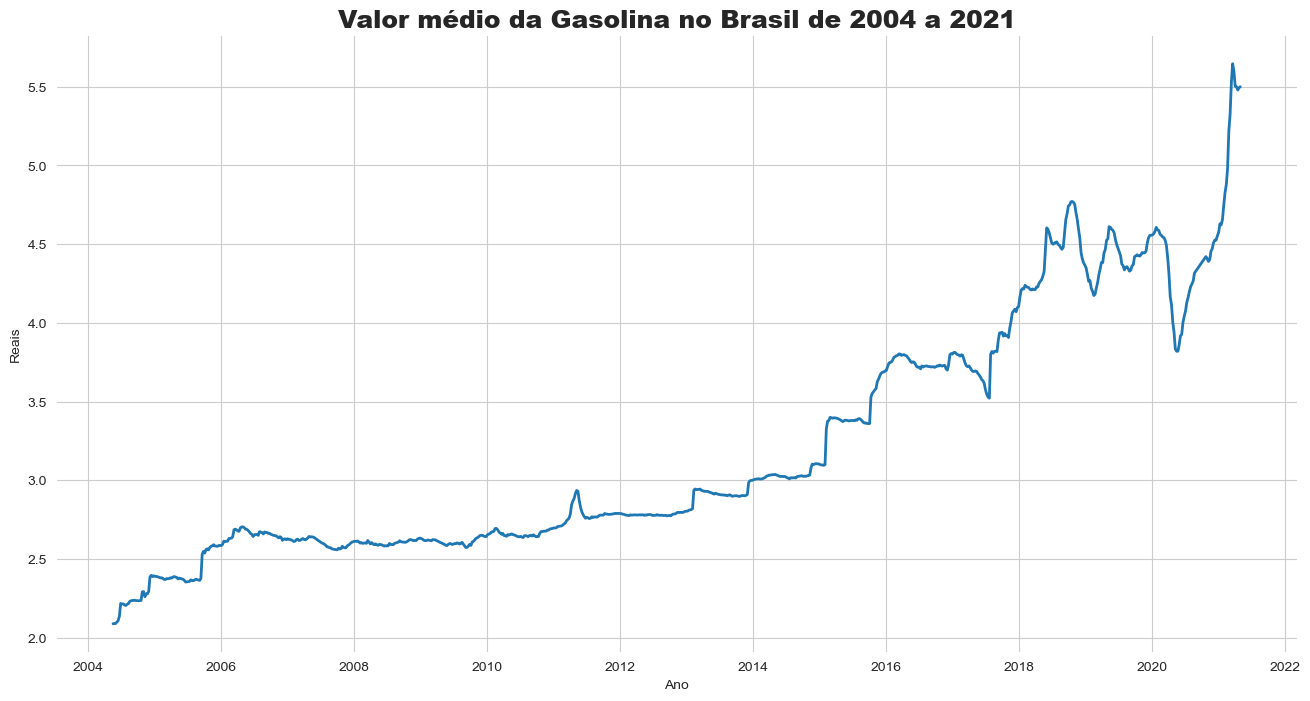

In [83]:
sns.set_style('whitegrid')
ax, fig = plt.subplots(figsize=(16,8))

ax = sns.lineplot(data = df_gasolina_comum.groupby('DATA FINAL')['PREÇO MÉDIO REVENDA'].mean(),linewidth=2)
plt.title('Valor médio da Gasolina no Brasil de 2004 a 2021', fontsize=18, weight='black')
ax.set(ylabel='Reais', xlabel='Ano')
sns.despine(bottom=True, left=True)

plt.show()

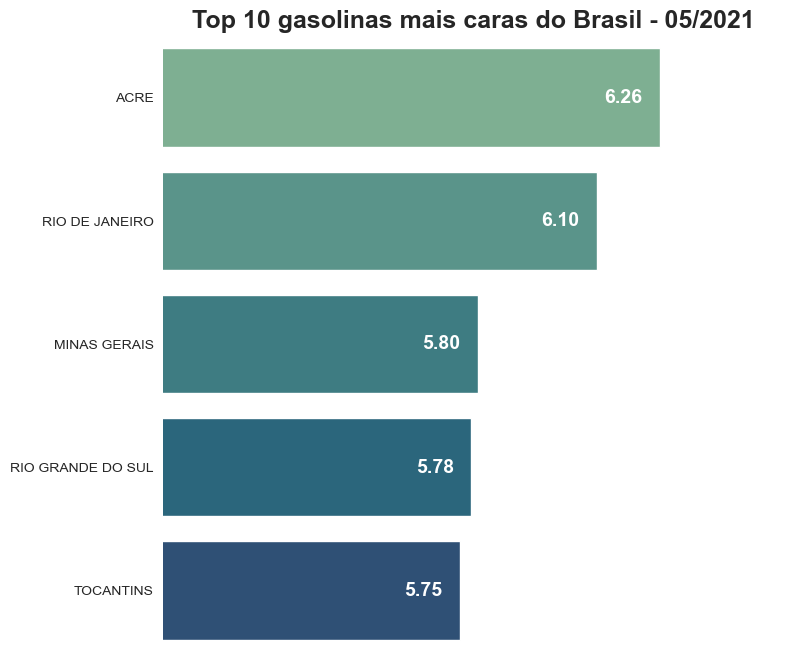

In [119]:
sns.set_style('white')
sns.color_palette("Paired")

ax, fig = plt.subplots(figsize=(8,8))
ax = sns.barplot(data=df_gasolina_comum[df_gasolina_comum['DATA FINAL'] == '2021/05'].sort_values(by='PREÇO MÉDIO REVENDA', ascending=False).head(), 
                 y='ESTADO', x='PREÇO MÉDIO REVENDA',palette='crest')
plt.bar_label(ax.containers[0], padding=-40, label_type='edge',fmt='%.2f', fontsize=14, color='white', weight='bold' )
plt.title('Top 10 gasolinas mais caras do Brasil - 05/2021', fontsize=18, weight='bold')
ax.set(xlabel='',ylabel='',xticklabels='', xlim=5)
sns.despine(bottom=True, left=True)

plt.show()

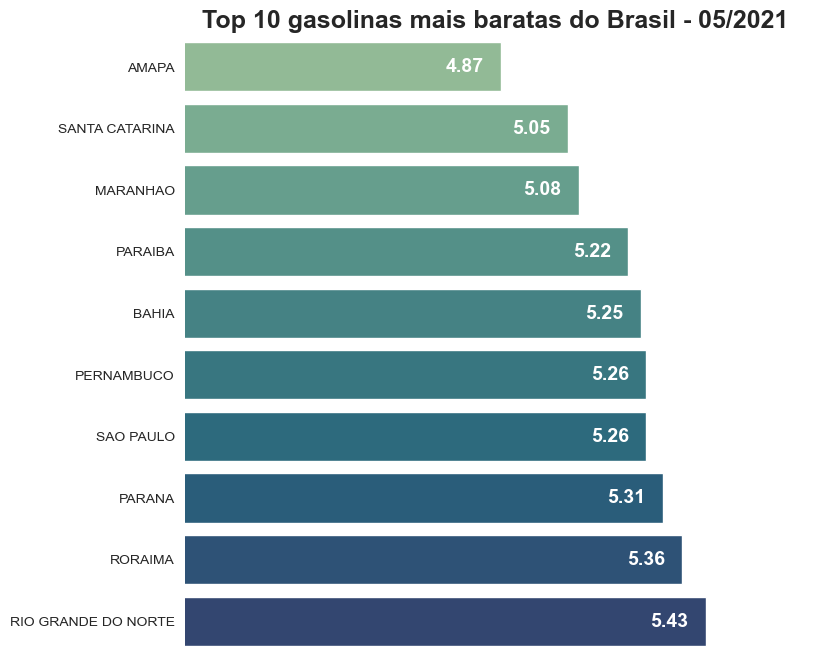

In [122]:
sns.set_style('white')

sns.color_palette("Paired")
ax, fig = plt.subplots(figsize=(8,8))
ax = sns.barplot(data=df_gasolina_comum[df_gasolina_comum['DATA FINAL'] == '2021/05'].sort_values(by='PREÇO MÉDIO REVENDA', ascending=True).head(10), 
                 y='ESTADO', x='PREÇO MÉDIO REVENDA',palette='crest')
plt.bar_label(ax.containers[0], padding=-40, label_type='edge',fmt='%.2f', fontsize=14, color='white', weight='bold')
plt.title('Top 10 gasolinas mais baratas do Brasil - 05/2021', fontsize=18, weight='bold')

ax.set(xlabel='',ylabel='',xticklabels='', xlim=4)
sns.despine(bottom=True, left=True)

plt.show()

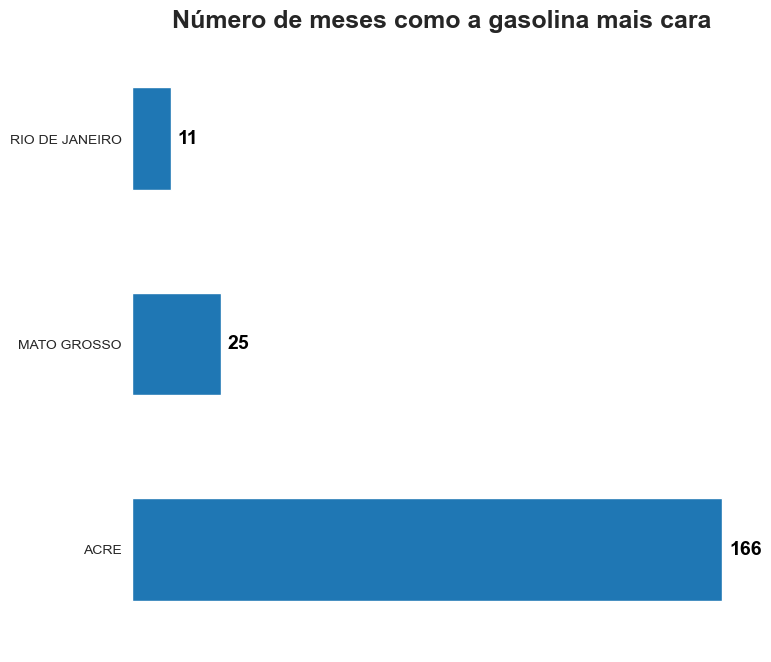

In [157]:
sns.set_style('white')

sns.color_palette("Paired")
ax, fig = plt.subplots(figsize=(8,8))
ax = df_comparacao['estado_maior_valor'].value_counts().head(3).plot(kind='barh')
plt.bar_label(ax.containers[0], padding=5, label_type='edge', fontsize=14, color='black', weight='bold')
plt.title('Número de meses como a gasolina mais cara', fontsize=18, weight='bold')

ax.set(xlabel='',ylabel='',xticklabels='')
sns.despine(bottom=True, left=True)

plt.show()

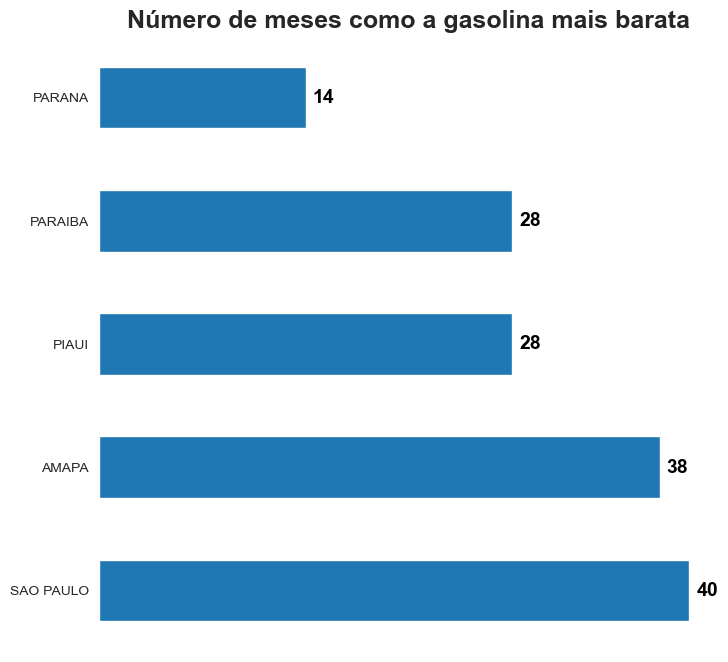

In [156]:
sns.set_style('white')

sns.color_palette("Paired")
ax, fig = plt.subplots(figsize=(8,8))
ax = df_comparacao['estado_menor_valor'].value_counts().head(5).plot(kind='barh')
plt.bar_label(ax.containers[0], padding=5, label_type='edge', fontsize=14, color='black', weight='bold')
plt.title('Número de meses como a gasolina mais barata', fontsize=18, weight='bold')

ax.set(xlabel='',ylabel='',xticklabels='')
sns.despine(bottom=True, left=True)

plt.show()